In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import sys
import os
import time
import numpy as np

import facenet
from draw_boxes import *

#img_path = "../curso_deep_learning_para_multimidia/3_reconhecimento_facial/images/whoever_big.png"
img_path_0 = "../curso_deep_learning_para_multimidia/3_reconhecimento_facial/faces/ney_0.png"
# img_path_1 = "../curso_deep_learning_para_multimidia/3_reconhecimento_facial/faces/ney_1.png"
img_path_nb = "./classification/me_0.png"
img_path_nb2 = "./classification/a_0.png"
thresh = 0.9 #threshold 0 to 1

In [2]:
sess = tf.Session()
facenet.load_model("./20170512-110547/20170512-110547.pb")
# facenet.load_model("../curso_deep_learning_para_multimidia/3_reconhecimento_facial/20170512-110547/20170512-110547.pb")

#Selecionando os tensores necessarios para execucao
image_placeholder = tf.get_default_graph().get_tensor_by_name("input:0") 
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0") 
train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")


Model filename: ./20170512-110547/20170512-110547.pb


In [3]:
#Funcao que calcula a distancia euclidiana entre dois vetores
def distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))

def get_embedding(img_path): 
    img_size = 160
    img = cv2.imread(img_path)
    #o opencv abre a imagem em BGR, necessario converter para RGB
    if img is None:
        print("Imagem não pode ser aberta.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Preparando a imagem de entrada
    resized = cv2.resize(img, (img_size,img_size),interpolation=cv2.INTER_CUBIC)
    reshaped = resized.reshape(-1,img_size, img_size,3)
    #Configurando entrada e execucao do FaceNet
    feed_dict = {image_placeholder: reshaped, train_placeholder: False}
    embedding = sess.run(embeddings , feed_dict=feed_dict) 
    return embedding[0], img

def get_embedding_img(img): 
    img_size = 160
    #Preparando a imagem de entrada
    resized = cv2.resize(img, (img_size,img_size),interpolation=cv2.INTER_CUBIC)
    reshaped = resized.reshape(-1,img_size, img_size,3)
    #Configurando entrada e execucao do FaceNet
    feed_dict = {image_placeholder: reshaped, train_placeholder: False}
    embedding = sess.run(embeddings , feed_dict=feed_dict) 
    return embedding[0]

def who_is_it_crop(img, database):
    min_dist = 1000 
    identity = -1
    #Calculando o embedding do visitante
    visitor = get_embedding_img(img)
    #Calculando a distacia do visitante com os demais funcionarios
    for name, employee in database.items():
        dist = distance(visitor, employee)
        
        if dist < min_dist:
            min_dist = dist 
            identity = name
    #verificando a identidade
    if min_dist > 0.5:
        print("Essa pessoa nao esta cadastrada!")
        return None, img
    else:
        return identity, img
    

ney - foto cadastrada:


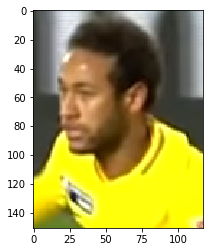

LG - foto cadastrada:


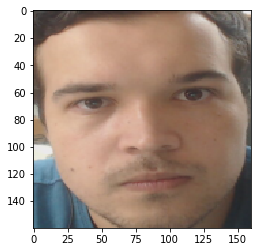

A - foto cadastrada:


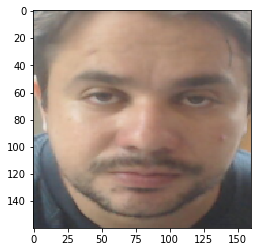

In [4]:
#preparando classificação

database = {}
database["ney"], img = get_embedding(img_path_0)
print("ney - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

database["LG"], img = get_embedding(img_path_nb)
print("LG - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

database["A"], img = get_embedding(img_path_nb2)
print("A - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

In [5]:
cap = cv2.VideoCapture(0)

cv2.namedWindow("window", cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty("window", cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

In [6]:
##CRAZY NAMES##

from faced import FaceDetector #for better cpu support
from faced.utils import annotate_image

face_detector = FaceDetector()

while cap.isOpened():
    now = time.time()
    # Capture frame-by-frame
    ret, frame = cap.read()

    if frame.shape[0] == 0:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if thresh:
        bboxes = face_detector.predict(rgb_frame, thresh)
    else:
        bboxes = face_detector.predict(rgb_frame)
    
    if len(bboxes) != 0:
        results = []
        for x,y,w,h,p in bboxes :
            ####
            x0=int(x-w/2)
            y0=int(y-h/2)
            x0plusw = int(x+w/2)
            y0plush = int(y+h/2)
            ####
            identity, image = who_is_it_crop(rgb_frame[y0: y0plush,x0 : x0plusw], database)
            results.append((x,y,w,h,p,identity))
        ann_frame = boxing(frame,results)
    else:
        ann_frame = frame
    
    #ann_frame = annotate_image(frame, bboxes)
    cv2.imshow('window', ann_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

#####################FROM PIC#####################

# img = cv2.imread(img_path_1)
# rgb_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# # Receives RGB numpy image (HxWxC) and
# # returns (x_center, y_center, width, height, prob) tuples. 
# bboxes = face_detector.predict(rgb_img, thresh)

# # Use this utils function to annotate the image.
# # ann_img = annotate_image(rgb_img, bboxes)

# # Show the image
# #cv2.imshow('image',ann_img)
# #cv2.waitKey(0)
# #cv2.destroyAllWindows()

# crops = []
# for x,y,w,h,p in bboxes :
#     x0=int(x-w)#/2)
#     y0=int(y-h)#/2)
#     x0plusw = int(x+w)#/2)
#     y0plush = int(y+h)#/2)
#     crops.append(rgb_img[y0: y0plush,x0 : x0plusw])
# #     crops.append(rgb_img[y: h,x : w])

# _ = plt.imshow(ann_img)
# plt.pause(0.1)


Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!
Essa pessoa nao esta cadastrada!


In [7]:
# for obj in crops :
#     identity, image = who_is_it_crop(obj, database)
#     print("Essa pessoa é o(a)",identity,"!")
#     _ = plt.imshow(image)
#     plt.pause(0.1)

In [8]:
# from faced import FaceDetector #for better cpu support
# from faced.utils import annotate_image

# face_detector = FaceDetector()

# past = time.time()

# while cap.isOpened():
#     now = time.time()
#     # Capture frame-by-frame
    
#     if (time-past) > 60:
#         #...
    
#     ret, frame = cap.read()

#     if frame.shape[0] == 0:
#         break

#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     if thresh:
#         bboxes = face_detector.predict(rgb_frame, thresh)
#     else:
#         bboxes = face_detector.predict(rgb_frame)
    
#     if len(bboxes) != 0:
#         results = []
#         for x,y,w,h,p in bboxes :
#             ####
#             x0=int(x-w/2)
#             y0=int(y-h/2)
#             x0plusw = int(x+w/2)
#             y0plush = int(y+h/2)
#             ####
#             identity, image = who_is_it_crop(rgb_frame[y0: y0plush,x0 : x0plusw], database)
#             results.append((x,y,w,h,p,identity))
#         ann_frame = boxing(frame,results)
#     else:
#         ann_frame = frame
    
#     #ann_frame = annotate_image(frame, bboxes)
#     cv2.imshow('window', ann_frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()